## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

W0723 15:28:55.127110  9540 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 15:28:55.234708  9540 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 15:28:55.273095  9540 deprecation_wrapper.py:119] From C:\Users\sabri\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 9s 173us/step - loss: 1.4562 - acc: 0.4841 - val_loss: 1.4753 - val_acc: 0.4773
Epoch 2/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.4431 - acc: 0.4896 - val_loss: 1.4707 - val_acc: 0.4802
Epoch 3/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.4385 - acc: 0.4911 - val_loss: 1.4676 - val_acc: 0.4804
Epoch 4/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.4352 - acc: 0.4925 - val_loss: 1.4654 - val_acc: 0.4819
Epoch 5/500
50000/50000 [==============================] - 8s 168us/step - loss: 1.4327 - acc: 0.4938 - val_loss: 1.4636 - val_acc: 0.4830
Epoch 6/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.4307 - acc: 0.4949 - val_loss: 1.4624 - val_acc: 0.4842
Epoch 7/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.4288 - acc: 0.4953 - val_loss: 1.

50000/50000 [==============================] - 8s 165us/step - loss: 1.3936 - acc: 0.5061 - val_loss: 1.4377 - val_acc: 0.4940
Epoch 60/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.3932 - acc: 0.5064 - val_loss: 1.4373 - val_acc: 0.4930
Epoch 61/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.3927 - acc: 0.5073 - val_loss: 1.4370 - val_acc: 0.4935
Epoch 62/500
50000/50000 [==============================] - 8s 169us/step - loss: 1.3922 - acc: 0.5062 - val_loss: 1.4369 - val_acc: 0.4935
Epoch 63/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.3917 - acc: 0.5065 - val_loss: 1.4367 - val_acc: 0.4935
Epoch 64/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.3913 - acc: 0.5068 - val_loss: 1.4361 - val_acc: 0.4953
Epoch 65/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.3909 - acc: 0.5073 - val_loss: 1.4357 - val_acc: 0.4943
Epoch 66/500
50000/50000 [=======

50000/50000 [==============================] - 8s 156us/step - loss: 1.3702 - acc: 0.5139 - val_loss: 1.4232 - val_acc: 0.4983
Epoch 118/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3698 - acc: 0.5147 - val_loss: 1.4231 - val_acc: 0.4975
Epoch 119/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3694 - acc: 0.5143 - val_loss: 1.4225 - val_acc: 0.4995
Epoch 120/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3691 - acc: 0.5148 - val_loss: 1.4225 - val_acc: 0.4992
Epoch 121/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.3686 - acc: 0.5152 - val_loss: 1.4225 - val_acc: 0.4980
Epoch 122/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.3684 - acc: 0.5147 - val_loss: 1.4220 - val_acc: 0.4994
Epoch 123/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.3680 - acc: 0.5155 - val_loss: 1.4218 - val_acc: 0.4989
Epoch 124/500
50000/50000 [

50000/50000 [==============================] - 8s 169us/step - loss: 1.3499 - acc: 0.5214 - val_loss: 1.4119 - val_acc: 0.5017
Epoch 176/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.3496 - acc: 0.5219 - val_loss: 1.4111 - val_acc: 0.5015
Epoch 177/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3492 - acc: 0.5225 - val_loss: 1.4113 - val_acc: 0.5017
Epoch 178/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.3489 - acc: 0.5214 - val_loss: 1.4107 - val_acc: 0.5023
Epoch 179/500
50000/50000 [==============================] - 8s 163us/step - loss: 1.3486 - acc: 0.5222 - val_loss: 1.4112 - val_acc: 0.5016
Epoch 180/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.3483 - acc: 0.5225 - val_loss: 1.4106 - val_acc: 0.5017
Epoch 181/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.3479 - acc: 0.5218 - val_loss: 1.4103 - val_acc: 0.5005
Epoch 182/500
50000/50000 [

50000/50000 [==============================] - 9s 171us/step - loss: 1.3314 - acc: 0.5279 - val_loss: 1.4010 - val_acc: 0.5043
Epoch 234/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.3310 - acc: 0.5286 - val_loss: 1.4012 - val_acc: 0.5040
Epoch 235/500
50000/50000 [==============================] - 8s 167us/step - loss: 1.3306 - acc: 0.5274 - val_loss: 1.4005 - val_acc: 0.5051
Epoch 236/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3303 - acc: 0.5285 - val_loss: 1.4007 - val_acc: 0.5052
Epoch 237/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.3300 - acc: 0.5285 - val_loss: 1.4012 - val_acc: 0.5035
Epoch 238/500
50000/50000 [==============================] - 8s 158us/step - loss: 1.3297 - acc: 0.5288 - val_loss: 1.4009 - val_acc: 0.5027
Epoch 239/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.3294 - acc: 0.5282 - val_loss: 1.3998 - val_acc: 0.5042
Epoch 240/500
50000/50000 [

50000/50000 [==============================] - 9s 174us/step - loss: 1.3134 - acc: 0.5345 - val_loss: 1.3915 - val_acc: 0.5073
Epoch 292/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.3132 - acc: 0.5345 - val_loss: 1.3919 - val_acc: 0.5095
Epoch 293/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3127 - acc: 0.5348 - val_loss: 1.3917 - val_acc: 0.5087
Epoch 294/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.3125 - acc: 0.5356 - val_loss: 1.3916 - val_acc: 0.5098
Epoch 295/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3122 - acc: 0.5351 - val_loss: 1.3911 - val_acc: 0.5087
Epoch 296/500
50000/50000 [==============================] - 8s 159us/step - loss: 1.3120 - acc: 0.5356 - val_loss: 1.3911 - val_acc: 0.5075
Epoch 297/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.3116 - acc: 0.5358 - val_loss: 1.3905 - val_acc: 0.5089
Epoch 298/500
50000/50000 [

50000/50000 [==============================] - 9s 186us/step - loss: 1.2960 - acc: 0.5421 - val_loss: 1.3835 - val_acc: 0.5131
Epoch 350/500
50000/50000 [==============================] - 9s 174us/step - loss: 1.2958 - acc: 0.5414 - val_loss: 1.3832 - val_acc: 0.5136
Epoch 351/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2955 - acc: 0.5423 - val_loss: 1.3826 - val_acc: 0.5123
Epoch 352/500
50000/50000 [==============================] - 9s 186us/step - loss: 1.2951 - acc: 0.5415 - val_loss: 1.3827 - val_acc: 0.5133
Epoch 353/500
50000/50000 [==============================] - 9s 177us/step - loss: 1.2949 - acc: 0.5424 - val_loss: 1.3831 - val_acc: 0.5143
Epoch 354/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.2947 - acc: 0.5425 - val_loss: 1.3827 - val_acc: 0.5150
Epoch 355/500
50000/50000 [==============================] - 9s 185us/step - loss: 1.2942 - acc: 0.5419 - val_loss: 1.3832 - val_acc: 0.5125
Epoch 356/500
50000/50000 [

50000/50000 [==============================] - 8s 170us/step - loss: 1.2791 - acc: 0.5479 - val_loss: 1.3750 - val_acc: 0.5193
Epoch 408/500
50000/50000 [==============================] - 9s 175us/step - loss: 1.2786 - acc: 0.5487 - val_loss: 1.3766 - val_acc: 0.5159
Epoch 409/500
50000/50000 [==============================] - 8s 164us/step - loss: 1.2784 - acc: 0.5494 - val_loss: 1.3752 - val_acc: 0.5165
Epoch 410/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.2780 - acc: 0.5493 - val_loss: 1.3748 - val_acc: 0.5186
Epoch 411/500
50000/50000 [==============================] - 8s 165us/step - loss: 1.2778 - acc: 0.5498 - val_loss: 1.3752 - val_acc: 0.5192
Epoch 412/500
50000/50000 [==============================] - 8s 161us/step - loss: 1.2776 - acc: 0.5489 - val_loss: 1.3750 - val_acc: 0.5196
Epoch 413/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.2772 - acc: 0.5490 - val_loss: 1.3754 - val_acc: 0.5193
Epoch 414/500
50000/50000 [

50000/50000 [==============================] - 9s 172us/step - loss: 1.2620 - acc: 0.5550 - val_loss: 1.3682 - val_acc: 0.5211
Epoch 466/500
50000/50000 [==============================] - 8s 166us/step - loss: 1.2618 - acc: 0.5550 - val_loss: 1.3688 - val_acc: 0.5205
Epoch 467/500
50000/50000 [==============================] - 8s 155us/step - loss: 1.2613 - acc: 0.5559 - val_loss: 1.3689 - val_acc: 0.5194
Epoch 468/500
50000/50000 [==============================] - 8s 157us/step - loss: 1.2612 - acc: 0.5552 - val_loss: 1.3675 - val_acc: 0.5221
Epoch 469/500
50000/50000 [==============================] - 8s 156us/step - loss: 1.2607 - acc: 0.5551 - val_loss: 1.3673 - val_acc: 0.5210
Epoch 470/500
50000/50000 [==============================] - 8s 162us/step - loss: 1.2604 - acc: 0.5548 - val_loss: 1.3680 - val_acc: 0.5203
Epoch 471/500
50000/50000 [==============================] - 8s 160us/step - loss: 1.2602 - acc: 0.5559 - val_loss: 1.3669 - val_acc: 0.5203
Epoch 472/500
50000/50000 [

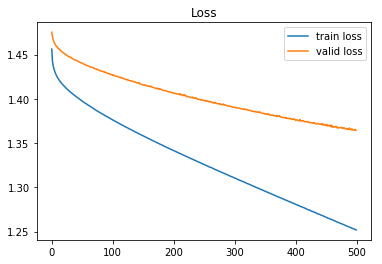

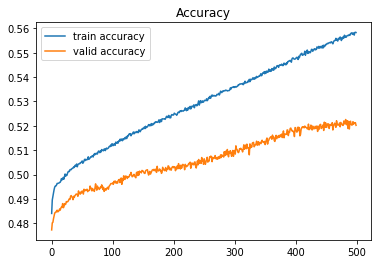

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()